In [12]:
from datetime import datetime

In [13]:
now = datetime.now()

In [14]:
now.strftime("%H:%M:%S")

'01:24:35'

In [11]:
da = now.date()

In [13]:
type(da)

datetime.date

In [15]:
print(str(now.date()) + '/' + str(now.time()) + '\t\t' + 'message' +'\n')

2022-05-14/23:23:02.831084		message



In [4]:
from File_Schema_Validation.Training_File_Schema_Validate_utils.training_file_schema_validate_utils import Train_file_schema_validate 

In [5]:
temp = Train_file_schema_validate('temp')

In [6]:
temp.getValuesFromSchema()

('cement_strength_08012020_1200.csv', 8, 6, 9)

In [5]:
import os

In [8]:
os.mkdir('Validated_Training_Batch_Files/GoodFile')

In [9]:
os.rmdir('Validated_Training_Batch_Files/GoodFile')

In [6]:
len(os.listdir('File_Schema_Validation'))

3

In [7]:
os.listdir('File_Schema_Validation')

['files_schema',
 'Prediction_File_Schema_Validation_utils',
 'Training_File_Schema_Validate_utils']

In [1]:
from File_Schema_Validation.Training_File_Schema_Validate_utils.training_file_schema_validate_utils import Train_file_schema_validate 

In [2]:
temp = Train_file_schema_validate('Training_Batch_Files')

In [3]:
temp.regex_pattern()

"['cement_strength']+['\\_']+[\\d_]+[\\d]+\\.csv"

In [4]:
temp.validate_file_name(temp.regex_pattern(), 8,6)

In [5]:
import re

In [8]:
"['cement_strength']+['\_'']+[\d_]+[\d]+\.csv"

"['cement_strength']+['\\_'']+[\\d_]+[\\d]+\\.csv"

In [26]:
reg = "['cement_strength']+['\_']+['\d']+['\_']+['\d']+\.csv"
reg

"['cement_strength']+['\\_']+['\\d']+['\\_']+['\\d']+\\.csv"

In [22]:
regex = "['cement_strength']+['\_'']+[\d_]+[\d]+\.csv"
regex

"['cement_strength']+['\\_'']+[\\d_]+[\\d]+\\.csv"

In [24]:
name = "cement_strength_08012020_120000.csv"

In [27]:
if (re.match(reg, name)):
    print(True)
else:
    print(False)

True


In [28]:
import pandas as pd

In [29]:
csv = pd.read_csv('Validated_Training_Batch_Files/GoodFileSchemaDataFolder/cement_strength_08012020_120000.csv')

In [31]:
len(csv.columns)

7

In [32]:
count = 0
for columns in csv:  ## for every col
    if (len(csv[columns]) - csv[columns].count()) == len(csv[columns]):  # count() does not consider null data
    count+=1
    shutil.move("Training_Raw_files_validated/Good_Raw/" + file,
                "Training_Raw_files_validated/Bad_Raw")
    self.logger.log(f,"Invalid Column Length for the file!! File moved to Bad Raw Folder :: %s" % file)
    break
if count==0:
    csv.rename(columns={"Unnamed: 0": "Wafer"}, inplace=True)
    csv.to_csv("Training_Raw_files_validated/Good_Raw/" + file, index=None, header=True)

NameError: name 'columns' is not defined

In [33]:
for columns in csv:
    print(columns)

Cement (component 1)(kg in a m^3 mixture)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Fly Ash (component 3)(kg in a m^3 mixture)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Fine Aggregate (component 7)(kg in a m^3 mixture)
Age (day)
Concrete compressive strength(MPa, megapascals) 


In [35]:
len(csv['Cement (component 1)(kg in a m^3 mixture)'])

1030

In [36]:
csv['Cement (component 1)(kg in a m^3 mixture)'].count()

1030

In [1]:
from File_Schema_Validation.Training_File_Schema_Validate_utils.training_file_schema_validate_utils import Train_file_schema_validate 

In [2]:
temp = Train_file_schema_validate('Training_Batch_Files')

In [3]:
temp.regex_pattern()

"['cement_strength']+['\\_']+['\\d']+['\\_']+['\\d']+\\.csv"

In [4]:
temp.reset_log()

In [5]:
temp.deleteGooDBadFileSchemaDataFolders()

In [6]:
temp.validate_file_name(temp.regex_pattern(), 8,6)

In [7]:
temp.validate_no_cols(9)

In [8]:
temp.validate_missing_values()

In [9]:
temp.reset_log()

In [1]:
from DbOperations.db_operations import DbOperations

In [2]:
db_object = DbOperations('Logs/training_db_ops_log_file.txt','Database/trainingDb.db', 'GoodDataTable')

In [3]:
db_object.setUpConnection()

In [3]:
import json

with open('File_Schema_Validation/files_schema/schema_training.json', 'r') as f:
    dic = json.load(f)

In [4]:
cols = dic.get('Col_Name')

In [5]:
cols

{'Cement _component_1': 'FLOAT',
 'Blast Furnace Slag _component_2': 'FLOAT',
 'Fly Ash _component_3': 'FLOAT',
 'Water_component_4': 'FLOAT',
 'Superplasticizer_component_5': 'FLOAT',
 'Coarse Aggregate_component_6': 'FLOAT',
 'Fine Aggregate_component_7': 'FLOAT',
 'Age_day': 'INTEGER',
 'Concrete_compressive _strength': 'FLOAT'}

In [6]:
cols.get('Cement _component_1')

'FLOAT'

In [7]:
cols['Cement _component_1']

'FLOAT'

In [1]:

from DbOperations.db_operations import DbOperations
db_object = DbOperations('Logs/training_db_ops_log_file.txt','Database/trainingDb.db', 'GoodDataTable')
#db_object.insertFilesInDB()

In [2]:
db_object.getTableFields()

['Cement _component_1',
 'Blast Furnace Slag _component_2',
 'Fly Ash _component_3',
 'Water_component_4',
 'Superplasticizer_component_5',
 'Coarse Aggregate_component_6',
 'Fine Aggregate_component_7',
 'Age_day',
 'Concrete_compressive _strength']

In [3]:
db_object.getRowsFromDb()

In [1]:
import csv

In [25]:
file = open('Db_Ingestion_Ready_Files/cement_strength_08012020_120021.csv', 'r')

In [26]:
next(file)

'Cement _component_1,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength\n'

In [5]:
next(file)

'540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99\n'

In [6]:
next(file)

'540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89\n'

In [29]:
file = open('Db_Ingestion_Ready_Files/cement_strength_08012020_120021.csv', 'r')

In [30]:
csv_obj = csv.reader(file, delimiter='\n')

In [31]:
for row in enumerate(csv_obj):  # moves through each row one by one and gives count to each row too.
    print(row[1])


['Cement _component_1,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength']
['540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99']
['540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89']
['332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27']
['332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05']
['198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.3']
['266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03']
['380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.7']
['380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45']
['266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85']
['475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29']
['198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.07']
['198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.02']
['427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01']
['190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33']
['304.0,76.0,0.0,228.0,0.0,932.0,670.0,28,47.81']
['380.0,0.0,0.0,228.0

In [15]:
for row in enumerate(csv_obj):
    print(row)

(0, ['Cement _component_1,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength'])
(1, ['540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99'])
(2, ['540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89'])
(3, ['332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27'])
(4, ['332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05'])
(5, ['198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.3'])
(6, ['266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03'])
(7, ['380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.7'])
(8, ['380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45'])
(9, ['266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85'])
(10, ['475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29'])
(11, ['198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.07'])
(12, ['198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.02'])
(13, ['427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01'])
(14, ['190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,

In [12]:
next(file)

StopIteration: 

In [9]:
import sqlite3

In [10]:
conn = sqlite3.connect('Database/trainingDb.db')

In [65]:
cursor = conn.cursor()

In [68]:
records = cursor.execute('select * from GoodDataTable')

In [69]:
lst = cursor.fetchall()
    

In [71]:
import pandas as pd

In [72]:
pd.DataFrame(lst)

,0,1,2,3,4,5,6,7,8
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [32]:
records.fetchone()

(540.0, 0.0, 0.0, 162.0, 2.5, 1040.0, 676.0, 28, 79.99)

In [34]:
fields = conn.execute('select sql from sqlite_masters where tbl_name= "GoodDataTable" and type= "table"')

OperationalError: no such table: sqlite_masters

In [41]:
fields = conn.execute('PRAGMA table_info("GoodDataTable")')

In [40]:
fields.fetchall()

[(0, 'Cement _component_1', 'FLOAT', 0, None, 0),
 (1, 'Blast Furnace Slag _component_2', 'FLOAT', 0, None, 0),
 (2, 'Fly Ash _component_3', 'FLOAT', 0, None, 0),
 (3, 'Water_component_4', 'FLOAT', 0, None, 0),
 (4, 'Superplasticizer_component_5', 'FLOAT', 0, None, 0),
 (5, 'Coarse Aggregate_component_6', 'FLOAT', 0, None, 0),
 (6, 'Fine Aggregate_component_7', 'FLOAT', 0, None, 0),
 (7, 'Age_day', 'INTEGER', 0, None, 0),
 (8, 'Concrete_compressive _strength', 'FLOAT', 0, None, 0)]

In [57]:
cursor.execute('PRAGMA table_info("GoodDataTable")')

In [54]:
del fields, lst

In [58]:
fields = []
for tup in cursor.fetchall():
    fields.append(tup[1])

In [59]:
fields

['Cement _component_1',
 'Blast Furnace Slag _component_2',
 'Fly Ash _component_3',
 'Water_component_4',
 'Superplasticizer_component_5',
 'Coarse Aggregate_component_6',
 'Fine Aggregate_component_7',
 'Age_day',
 'Concrete_compressive _strength']

In [60]:
str(fields)

"['Cement _component_1', 'Blast Furnace Slag _component_2', 'Fly Ash _component_3', 'Water_component_4', 'Superplasticizer_component_5', 'Coarse Aggregate_component_6', 'Fine Aggregate_component_7', 'Age_day', 'Concrete_compressive _strength']"

In [61]:
cursor

In [64]:
cursor.close()

In [63]:
cursor

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Final_Training_CSV_File/ready_to_train_file.csv")

In [3]:


df.isnull().sum()

Cement _component_1                0
Blast Furnace Slag _component_2    0
Fly Ash _component_3               0
Water_component_4                  0
Superplasticizer_component_5       0
Coarse Aggregate_component_6       0
Fine Aggregate_component_7         0
Age_day                            0
Concrete_compressive _strength     0
dtype: int64

In [7]:
df.columns

Index(['Cement _component_1', 'Blast Furnace Slag _component_2',
       'Fly Ash _component_3', 'Water_component_4',
       'Superplasticizer_component_5', 'Coarse Aggregate_component_6',
       'Fine Aggregate_component_7', 'Age_day',
       'Concrete_compressive _strength'],
      dtype='object')

In [9]:
null_cols = []

for i in df.columns:
    if df[i].isnull().sum() != 0:
        null_cols.append(i)



In [10]:
null_cols

[]

In [11]:
df['Cement _component_1'].isnull().sum() != 0

False

In [1]:
from Model.Data_Loader.Training.training_data_loader import Training_data_loader
train_data_loader_obj = Training_data_loader()
df = train_data_loader_obj.getTrainingDataFrame()
df.head(5)
from Model.Data_Pre_Processing.preprocessing import DataPreProcessing
preprocessor = DataPreProcessing()
# check null

preprocessor.containsNull(df)
preprocessor.getColNames(df)
df = preprocessor.convertToLogNormalForm(df, ['Cement _component_1', 'Blast Furnace Slag _component_2',
       'Fly Ash _component_3', 'Water_component_4',
       'Superplasticizer_component_5', 'Coarse Aggregate_component_6',
       'Fine Aggregate_component_7', 'Age_day'])

df.head(5)
df = preprocessor.handleOutliers(df)

df.head(5)
X, Y = preprocessor.separateDependentIndependentFeatures(df, ['Cement _component_1', 'Blast Furnace Slag _component_2',
       'Fly Ash _component_3', 'Water_component_4',
       'Superplasticizer_component_5', 'Coarse Aggregate_component_6',
       'Fine Aggregate_component_7', 'Age_day'])
Y
X_scaled = preprocessor.standardScaler(X)
X_scaled
len(X_scaled)




973

In [2]:
X_scaled

array([[ 1.94313714, -1.02877124, -0.92840716, ...,  0.8587618 ,
        -1.43033841,  0.15015202],
       [ 1.94313714, -1.02877124, -0.92840716, ...,  1.03958746,
        -1.43033841,  0.15015202],
       [-0.69130184,  0.99440847, -0.92840716, ...,  0.08779122,
         0.65457216,  2.47170769],
       ...,
       [-1.45491617,  1.01555394,  1.04623673, ..., -1.07385109,
         0.06288981,  0.15015202],
       [-1.27392708,  1.1356003 , -0.92840716, ...,  0.23151092,
         0.18129161,  0.15015202],
       [ 0.0264152 ,  0.88141404,  0.91018917, ..., -1.47486488,
        -0.18760461,  0.15015202]])

In [3]:
# Clustering

from Model.Clustering.cluster import Cluster

cluster_obj = Cluster()

/home/himanshu/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/himanshu/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/himanshu/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/himanshu/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated i

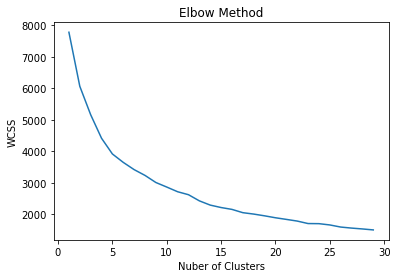

In [5]:
knee =cluster_obj.knee_finder(X_scaled)

In [7]:
knee

9

/home/himanshu/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/himanshu/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/himanshu/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/himanshu/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated i

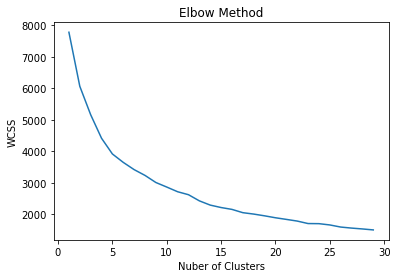

In [8]:
pred = cluster_obj.kmeans(X_scaled)

In [13]:
pred

array([1, 1, 3, 6, 6, 5, 5, 6, 6, 3, 5, 3, 5, 5, 5, 3, 3, 3, 3, 3, 5, 3,
       3, 3, 8, 6, 6, 5, 5, 5, 3, 3, 3, 8, 6, 3, 3, 5, 6, 8, 4, 6, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
import pandas as pd

pd.Series(pred, name= 'Y_cluster')

0      1
1      1
2      3
3      6
4      6
      ..
968    7
969    7
970    7
971    2
972    7
Name: Y_cluster, Length: 973, dtype: int32

In [16]:
import numpy as np

In [17]:
len(X_scaled)

973

In [23]:
reshaped = np.reshape(pred, (len(pred),1))

In [24]:
np.concatenate([X_scaled, reshaped], axis = 1)

array([[ 1.94313714, -1.02877124, -0.92840716, ..., -1.43033841,
         0.15015202,  1.        ],
       [ 1.94313714, -1.02877124, -0.92840716, ..., -1.43033841,
         0.15015202,  1.        ],
       [-0.69130184,  0.99440847, -0.92840716, ...,  0.65457216,
         2.47170769,  3.        ],
       ...,
       [-1.45491617,  1.01555394,  1.04623673, ...,  0.06288981,
         0.15015202,  7.        ],
       [-1.27392708,  1.1356003 , -0.92840716, ...,  0.18129161,
         0.15015202,  2.        ],
       [ 0.0264152 ,  0.88141404,  0.91018917, ..., -0.18760461,
         0.15015202,  7.        ]])

In [5]:
pd.DataFrame(np.concatenate([X_scaled, reshaped, Y], axis = 1), columns= ['Cement _component_1', 'Blast Furnace Slag _component_2',
       'Fly Ash _component_3', 'Water_component_4',
       'Superplasticizer_component_5', 'Coarse Aggregate_component_6',
       'Fine Aggregate_component_7', 'Age_day', 'Cluster', 'Concrete_compressive _strength'])

NameError: name 'pd' is not defined

In [1]:
from Model.Data_Pre_Processing.preprocessing import DataPreProcessing

temp = DataPreProcessing()

In [2]:
cols = temp.getColsNames('File_Schema_Validation/files_schema/schema_training.json')

In [4]:
cols

['Cement _component_1',
 'Blast Furnace Slag _component_2',
 'Fly Ash _component_3',
 'Water_component_4',
 'Superplasticizer_component_5',
 'Coarse Aggregate_component_6',
 'Fine Aggregate_component_7',
 'Age_day',
 'Concrete_compressive _strength']

/home/himanshu/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/himanshu/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/himanshu/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/himanshu/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated i

,Cement _component_1,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength,Cluster
0,2.633794,6.293419,0.000000,0.000000,5.093750,1.252763,6.947937,6.517671,3.367296,2.0
1,1.561507,6.293419,0.000000,0.000000,5.093750,1.252763,6.962243,6.517671,3.367296,2.0
2,0.519434,5.296315,4.893352,0.000000,5.262690,0.000000,6.886940,6.717200,5.888878,1.0
3,0.681165,5.587249,4.744932,0.000000,5.433722,0.000000,6.838405,6.508769,4.510860,4.0
4,0.611259,5.587249,4.744932,0.000000,5.433722,0.000000,6.838405,6.508769,3.367296,4.0
...,...,...,...,...,...,...,...,...,...,...
968,0.518249,5.625461,4.762174,4.514151,5.196285,2.292535,6.769757,6.645481,3.367296,1.0
969,-0.257826,5.778271,0.000000,4.758749,5.283204,2.433613,6.707962,6.702452,3.367296,0.0
970,-0.700959,5.007296,4.944495,4.696837,5.266311,1.960095,6.795034,6.660575,3.367296,0.0
971,-0.163631,5.075799,5.234845,0.000000,5.173887,2.509599,6.898311,6.671906,3.367296,1.0


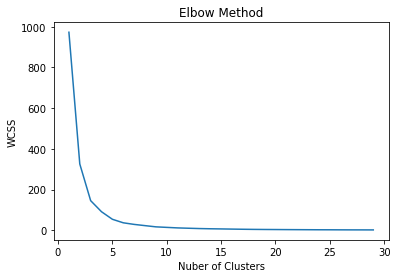

In [1]:
from Model.Data_Loader.Training.training_data_loader import Training_data_loader
train_data_loader_obj = Training_data_loader()
df = train_data_loader_obj.getTrainingDataFrame()
df.head(5)
from Model.Data_Pre_Processing.preprocessing import DataPreProcessing
preprocessor = DataPreProcessing()
# check null

preprocessor.containsNull(df)
preprocessor.getDfColNames(df)
df = preprocessor.convertToLogNormalForm(df, ['Cement _component_1', 'Blast Furnace Slag _component_2',
       'Fly Ash _component_3', 'Water_component_4',
       'Superplasticizer_component_5', 'Coarse Aggregate_component_6',
       'Fine Aggregate_component_7', 'Age_day'])

df.head(5)
df = preprocessor.handleOutliers(df)

df.head(5)
X, Y = preprocessor.separateDependentIndependentFeatures(df, ['Cement _component_1', 'Blast Furnace Slag _component_2',
       'Fly Ash _component_3', 'Water_component_4',
       'Superplasticizer_component_5', 'Coarse Aggregate_component_6',
       'Fine Aggregate_component_7', 'Age_day'])
Y
X_scaled = preprocessor.standardScaler(X)
X_scaled
len(X_scaled)



# Clustering

from Model.Clustering.cluster import Cluster

cluster_obj = Cluster()
pred = cluster_obj.kmeans(X_scaled)
pred
reshaped_cluster_y = preprocessor.reshape_array(data = pred, shape = (len(pred), 1))
reshaped_cluster_y
column_names = preprocessor.getColsNames('File_Schema_Validation/files_schema/schema_training.json')
column_names.append('Cluster')
new_array = preprocessor.concatenate_array([X_scaled, Y, reshaped_cluster_y], axis = 1)
df = preprocessor.make_df(new_array,columns= column_names)
df

In [2]:
df 

,Cement _component_1,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength,Cluster
0,2.633794,6.293419,0.000000,0.000000,5.093750,1.252763,6.947937,6.517671,3.367296,2.0
1,1.561507,6.293419,0.000000,0.000000,5.093750,1.252763,6.962243,6.517671,3.367296,2.0
2,0.519434,5.296315,4.893352,0.000000,5.262690,0.000000,6.886940,6.717200,5.888878,1.0
3,0.681165,5.587249,4.744932,0.000000,5.433722,0.000000,6.838405,6.508769,4.510860,4.0
4,0.611259,5.587249,4.744932,0.000000,5.433722,0.000000,6.838405,6.508769,3.367296,4.0
...,...,...,...,...,...,...,...,...,...,...
968,0.518249,5.625461,4.762174,4.514151,5.196285,2.292535,6.769757,6.645481,3.367296,1.0
969,-0.257826,5.778271,0.000000,4.758749,5.283204,2.433613,6.707962,6.702452,3.367296,0.0
970,-0.700959,5.007296,4.944495,4.696837,5.266311,1.960095,6.795034,6.660575,3.367296,0.0
971,-0.163631,5.075799,5.234845,0.000000,5.173887,2.509599,6.898311,6.671906,3.367296,1.0


In [3]:
X, Y = preprocessor.separateDependentIndependentFeatures(df, "Concrete_compressive _strength")

In [4]:
X

,Cement _component_1,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Cluster
0,2.633794,6.293419,0.000000,0.000000,5.093750,1.252763,6.947937,6.517671,2.0
1,1.561507,6.293419,0.000000,0.000000,5.093750,1.252763,6.962243,6.517671,2.0
2,0.519434,5.296315,4.893352,0.000000,5.262690,0.000000,6.886940,6.717200,1.0
3,0.681165,5.587249,4.744932,0.000000,5.433722,0.000000,6.838405,6.508769,4.0
4,0.611259,5.587249,4.744932,0.000000,5.433722,0.000000,6.838405,6.508769,4.0
...,...,...,...,...,...,...,...,...,...
968,0.518249,5.625461,4.762174,4.514151,5.196285,2.292535,6.769757,6.645481,1.0
969,-0.257826,5.778271,0.000000,4.758749,5.283204,2.433613,6.707962,6.702452,0.0
970,-0.700959,5.007296,4.944495,4.696837,5.266311,1.960095,6.795034,6.660575,0.0
971,-0.163631,5.075799,5.234845,0.000000,5.173887,2.509599,6.898311,6.671906,1.0


In [5]:
Y

0      3.367296
1      3.367296
2      5.888878
3      4.510860
4      3.367296
         ...   
968    3.367296
969    3.367296
970    3.367296
971    3.367296
972    3.367296
Name: Concrete_compressive _strength, Length: 973, dtype: float64

In [6]:
# train_test_split 

x_train, x_test, y_train, y_test = preprocessor.df_train_test_split(X, Y, split_ratio=0.1)

In [7]:
# # Model Selection

from Model.Model_Selection.model_selector import ModelSelector

model_selector_obj = ModelSelector()

In [8]:
result = model_selector_obj.compareModel(x_train.drop(['Cluster'], axis = 1), y_train)